In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df1 = pd.read_csv("dataset5/Electric_Vehicle_Population_Data.csv")
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96961 entries, 0 to 96960
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         96961 non-null  object 
 1   County                                             96954 non-null  object 
 2   City                                               96961 non-null  object 
 3   State                                              96961 non-null  object 
 4   ZIP Code                                           96961 non-null  int64  
 5   Model Year                                         96961 non-null  int64  
 6   Make                                               96961 non-null  object 
 7   Model                                              96961 non-null  object 
 8   Electric Vehicle Type                              96961 non-null  object 
 9   Clean 

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1N4AZ0CP3E,King,RENTON,WA,98059,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,5.0,250845815,POINT (-122.132064 47.494834),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,1N4AZ1CP2J,King,REDMOND,WA,98053,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,45.0,309178936,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,WBY1Z8C50H,King,SEATTLE,WA,98125,2017,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,46.0,8751711,POINT (-122.303604 47.716244),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJ3E1EA0J,Riverside,WILDOMAR,CA,92595,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,196439911,POINT (-117.261693 33.614732),NaN
4,WVWPR7AU6K,King,AUBURN,WA,98092,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,0,47.0,161777584,POINT (-122.148214 47.292978),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [40]:
df1 = df1[["Make","Model","Electric Vehicle Type","Clean Alternative Fuel Vehicle (CAFV) Eligibility","Electric Range","Base MSRP"]]
df1.drop_duplicates(inplace=True)


In [48]:
df1.shape

(229, 6)

In [41]:
df1.head()

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0
1,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0
2,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0
3,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0
4,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,0


In [47]:
df4 = pd.read_csv("dataset_splitup\dataset1\Electric_Car.csv")
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
None


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [75]:
ls1 = [brand.lower() for brand in df1["Make"].sort_values().unique()]
ls2 = [brand.lower().replace(" ","") for brand in df4["Brand"].sort_values().unique()]
common_values = set(ls1).intersection(set(ls2))
common_values = list(common_values)
common_values

['volvo',
 'tesla',
 'porsche',
 'nissan',
 'smart',
 'jaguar',
 'fiat',
 'kia',
 'bmw',
 'honda',
 'audi',
 'polestar',
 'volkswagen',
 'ford',
 'hyundai',
 'mini']

In [ ]:
df5 =

In [6]:
df2 = pd.read_csv("dataset5/multiTimeline.csv", header=1)
df2[['Year', 'month']] = df2['Month'].str.split('-', expand=True)
df2.drop(columns=["month"], inplace=True)
print(df2.info())
print(df2.columns)
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Month                      236 non-null    object
 1   Electric vehicle: (India)  236 non-null    int64 
 2   Year                       236 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.7+ KB
None
Index(['Month', 'Electric vehicle: (India)', 'Year'], dtype='object')


,Month,Electric vehicle: (India),Year
0,2004-01,73,2004
1,2004-02,0,2004
2,2004-03,100,2004
3,2004-04,0,2004
4,2004-05,0,2004


In [7]:
data = df2.groupby("Year")["Electric vehicle: (India)"].sum()

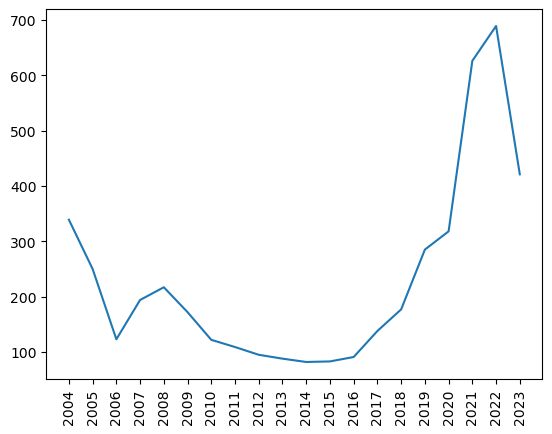

In [8]:
plt.plot(data)
plt.xticks(rotation = 90)
plt.show()

In [37]:
df3 = pd.read_csv("dataset5/RS_Session_256_AU_2673_2.ii_.csv")
print(df3.info())
df3.tail()
df3.drop(index=25, inplace=True)
df3.sort_values("EV Charging Stations Sanctioned", inplace=True, ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           26 non-null     object
 1   Category                         26 non-null     object
 2   Expressways/Highways             26 non-null     object
 3   EV Charging Stations Sanctioned  26 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 964.0+ bytes
None


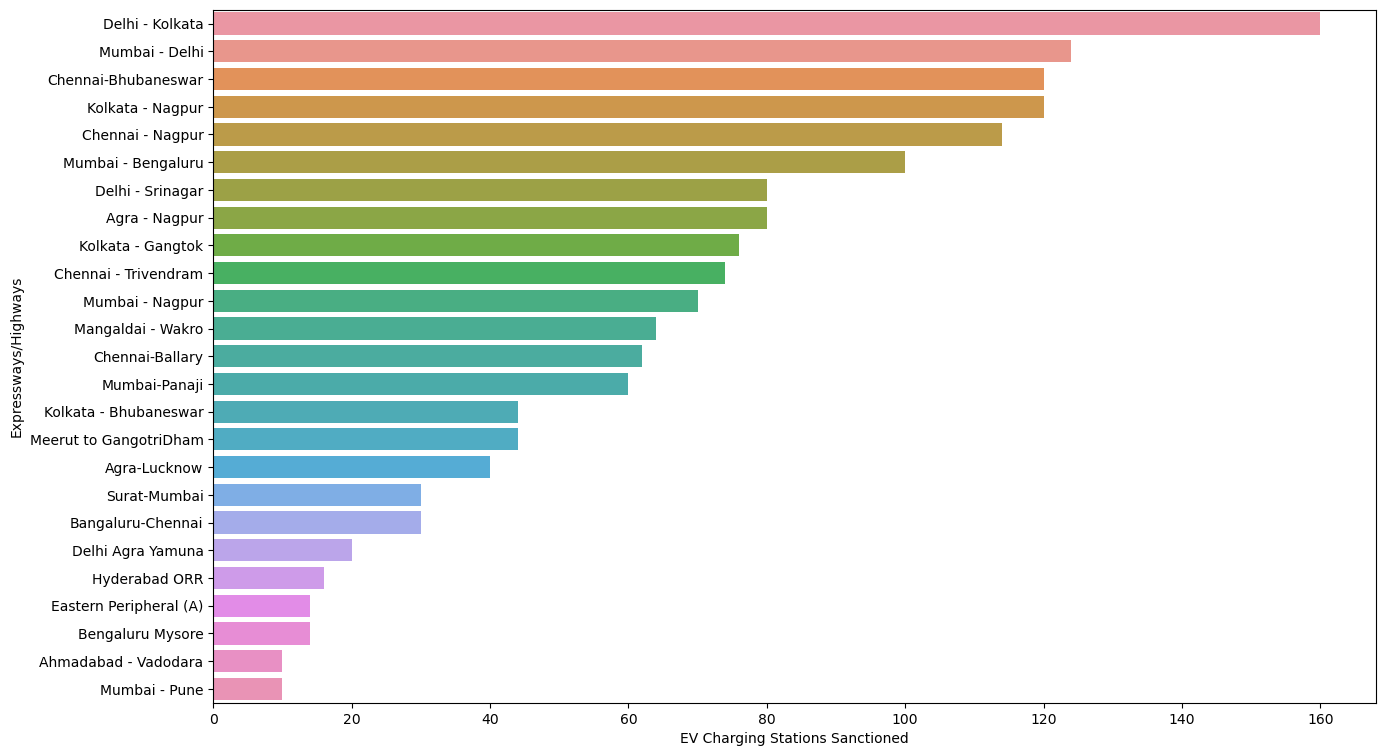

In [38]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(y=df3["Expressways/Highways"], x=df3["EV Charging Stations Sanctioned"],orient="horizontal")

plt.show()

In [ ]:
df4